<a href="https://colab.research.google.com/github/este7734/Project_DS_Tools/blob/master/NLP/MST698S_German_NLP_Welt_Site2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Tools and Techniques

# Natural Language Processing Exercise

Perform the tasks below to demonstrate your understanding of NLP.  You may reference the TextBlob documentation here:

https://textblob.readthedocs.io/en/dev/

Natural Language Processing is a very versatile tool in data science.  Among other things, it can be used to quantitate the affect, or emotional content, of text.  This technique is called sentiment analysis, and is often used in industry to measure how customers feel about a particular company or product.

Sputnik is a Russian media outlet.  In this exercise, you will measure the sentiment of an English-language Sputnik article that mentions a U.S. political candidates.

In the space below, specify the location of the news_text.txt file:

### <font color='green'> Save Text Files </font> to Your Temporary Colab folder

In [0]:
%ls # List files in the your temporary folder to verify they are there.

sample_data/  welt_inv_battle.txt


### <font color='green'> Read </font> in File(s) to Colab Environment

In [0]:
file1 = 'Spiegel_DuetcheBank_Trump.txt'
file2 = 'Spiegel_Iran_Protests.txt'
file3 = 'Spiegel_Trump_Peace_Plan.txt'

file4 = 'Zeit_URL_1_Holocaust.txt'
file5 = 'Zeit_URL_2_xenophobic_politicians.txt'
file6 = 'Zeit_URL_3_NATO_Germany_contribution.txt'

file7 = 'news_text.txt'
file8 = 'welt_Putin_Cyberwarfare.txt'
file9 = 'welt_inv_battle.txt'
file_path = r'welt_inv_battle.txt'
file_path

'welt_inv_battle.txt'

In [0]:
#open text
def open_text(file_path):
    with open(file_path, 'r') as document:
        text = document.read()
    return text

In [0]:
text = open_text(file_path)
text

'One frosty January morning, it dawned on Laura Galante that the secret mission she’d been working on would lead her right into the heart of world politics, and soon. She was sitting in a suburb of Washington DC, in an office with white walls, empty shelves and large windows. It was the year 2013 and Galante was tired, as so often during that time. Quite apart from the difficult mission she was working on, she was also pregnant. Together with a small team she was trying to uncover something. No one besides them and their boss were allowed know about it, not even within their own company.This, it occured to Galante while a cold wind sweeped across the empty streets outside, will change my life. She was about to make a global power into a personal enemy.It was only a few months ago that she had received a phone call. A computer security company was looking for specialists able to filter specific electronic data out of a huge amount showing how exactly criminals and governments attempt to

## <font color='green'> Import </font> Dependencies

In [0]:
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

# Import these dependencies if using Google Colab 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### <font color='skyblue'> Ingest </font> Text to Analyze

In [0]:
blob = TextBlob(text)

Now that you have instatiated your text as a TextBlob object, you can perform text manipulations.  First, let's generate a list of all sentences in your TextBlob object:

blob_sentences = blob.sentences

Do this in the space below, and print the result (you should see a list of sentences):

In [0]:
blob_sentences = blob.sentences
blob_sentences

[Sentence("One frosty January morning, it dawned on Laura Galante that the secret mission she’d been working on would lead her right into the heart of world politics, and soon."),
 Sentence("She was sitting in a suburb of Washington DC, in an office with white walls, empty shelves and large windows."),
 Sentence("It was the year 2013 and Galante was tired, as so often during that time."),
 Sentence("Quite apart from the difficult mission she was working on, she was also pregnant."),
 Sentence("Together with a small team she was trying to uncover something."),
 Sentence("No one besides them and their boss were allowed know about it, not even within their own company.This, it occured to Galante while a cold wind sweeped across the empty streets outside, will change my life."),
 Sentence("She was about to make a global power into a personal enemy.It was only a few months ago that she had received a phone call."),
 Sentence("A computer security company was looking for specialists able to f

In [0]:
# Allow user to type in key words to search the text for
filter_list = input('Enter words to filter by separated by commas: ').title() # This is still a string... not a list yet

Enter words to filter by separated by commas: galante,mandia


### <font color='skyblue'> Enter </font>  Key Words to Search in Text

In [0]:
fliter_list = list(filter_list) # Convert string to a list (it currently has 1 long string element of key words)

f = []
for word in (filter_list.split(",")):  # Split string into separate words, separate by comma
  f.append(word)                       # Generate new list containing each key word
f # This is now a list of key words that the user typed in

['Galante', 'Mandia']

## <font color='skyblue'> Search </font>  Sentences for Key Words



In [0]:
# Instantiate list for holding the sentences
sentences = []

# Generate empty list of lists 
for i in range(len(f)):
  sentences.append([])
print('Here is what you just made, and empty list of lists: ', sentences, '\n')

# Generate lists of sentences for each key word and plug them into the list of lists from above            
for i in range(len(f)):
  for sentence in blob_sentences:
    if f[i] in sentence:
        sentences[i].append(sentence)
        
# Print number of sentences containing each key word
# Print out all sentences containing each key word
for i in range(len(f)):
  print('-----------------------------------------------------------------')   
  print('There are {} sentences in containing the word: {} '.format(len(sentences[i]), f[i]), '\n') 
  for sentence in sentences[i]:
      print(sentence)


Here is what you just made, and empty list of lists:  [[], []] 

-----------------------------------------------------------------
There are 39 sentences in containing the word: Galante  

One frosty January morning, it dawned on Laura Galante that the secret mission she’d been working on would lead her right into the heart of world politics, and soon.
It was the year 2013 and Galante was tired, as so often during that time.
No one besides them and their boss were allowed know about it, not even within their own company.This, it occured to Galante while a cold wind sweeped across the empty streets outside, will change my life.
She had a degree in Politics and Law and had previously been analysing cyber attacks in the US Department of Defence.This is how Galante became a warrior in an invisible war, the cyber war.She is now head of her department at FireEye, an American company for computer security.
This is where Laura Galante comes in.Sitting at their computers, the enemies send out m



---







## Print <font color='skyblue'> Statistics </font> 

In [0]:
print('Article', blob.sentiment) # Overall article sentiment
pol = blob.sentiment[0]
sub = blob.sentiment[1]
bailey_sent = pol*sub
print('This is the Bailey Sentiment: {}'.format(bailey_sent))

Article Sentiment(polarity=0.05388877280585204, subjectivity=0.4061334794193703)
This is the Bailey Sentiment: 0.02188603480128063


In [0]:
# Print out sentiment values for each key word
print('Sentence | Polarity | Subjectivity | Sentiment | Avg Sentiment')
for i in range(len(f)):
  print('\n----------------------', f[i], '--------------------------------')
  for j in range(len(sentences[i])):
    polarity = sentences[i][j].sentiment[0]
    subjectivity = sentences[i][j].sentiment[1]
    bailey_sentiment = polarity * subjectivity

    print(j, '       |', round(polarity, 2), '    |', round(subjectivity, 2), '        |', round(bailey_sentiment, 2), '     |', 'avg')
  print('=============================================================')

Sentence | Polarity | Subjectivity | Sentiment | Avg Sentiment

---------------------- Galante --------------------------------
0        | -0.06     | 0.62         | -0.04      | avg
1        | -0.4     | 0.7         | -0.28      | avg
2        | -0.03     | 0.64         | -0.02      | avg
3        | -0.08     | 0.08         | -0.01      | avg
4        | 0.0     | 0.0         | 0.0      | avg
5        | 0.15     | 0.49         | 0.07      | avg
6        | -0.04     | 0.5         | -0.02      | avg
7        | -0.24     | 0.42         | -0.1      | avg
8        | 0.2     | 0.4         | 0.08      | avg
9        | -0.06     | 0.37         | -0.02      | avg
10        | 0.05     | 0.19         | 0.01      | avg
11        | 0.19     | 0.61         | 0.12      | avg
12        | 0.16     | 0.6         | 0.1      | avg
13        | -0.4     | 0.7         | -0.28      | avg
14        | 0.0     | 0.0         | 0.0      | avg
15        | 0.0     | 0.06         | 0.0      | avg
16        | -0.08   

In [0]:
# Test Section - This is used to test and see individual values to see if everything makes sense
# Change the indicies in between the brackets to compare the different outputs
print(sentences[0][0].sentiment)
print(np.average(sentences[0][0].sentiment))
print(round(np.average(sentences[0][0].sentiment), 3))

Sentiment(polarity=-0.05714285714285716, subjectivity=0.6178571428571429)
0.28035714285714286
0.28


## Calculate <font color='yellow'> Sentiment </font>  for Each Key Word



In [0]:
sentiment = [[],[],[],[],[],[]]
print('---Average Sentiment---')
for i in range(len(f)):
  try:
    for j in range(len(sentences[i])):
      sentiment[i].append(sentences[i][j].sentiment[0] * sentences[i][j].sentiment[1])  
      np.average(sentiment[i]) 
  except:
    print('The List is Empty')
  print(f[i], np.average(sentiment[i])) 

---Average Sentiment---
Galante 0.016330655792024064
Mandia 0.03429831191735954


In [0]:
# Test Section - This is used to test and see individual values to see if everything makes sense
# Change the indicies in between the brackets to compare the different outputs
print('1', np.average(sentiment[0]))
print('2', np.average(sentiment[1]))
print('3', np.average(sentiment[2]))
print('4', np.average(sentiment[3]))

1 0.016330655792024064
2 0.03429831191735954
3 nan
4 nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## <font color='orange'> Plot Resutls  </font> 

---



In [0]:
xaxis = []
for i in range(len(sentiment[0])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38].


(-1.0, 1.0)

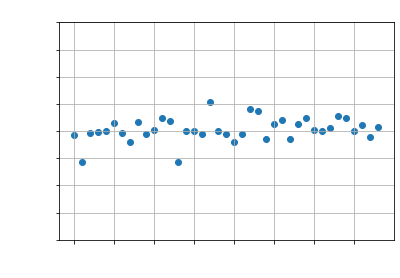

In [0]:
plt.scatter(xaxis, sentiment[0])
plt.grid()
plt.title(f[0] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

In [0]:
xaxis = []
for i in range(len(sentiment[2])): # sentiment[0] is the list of sentiments for the first key word
  xaxis.append(i)
print("The xaxis is {}.".format(xaxis))

The xaxis is [0, 1, 2, 3].


(-1.0, 1.0)

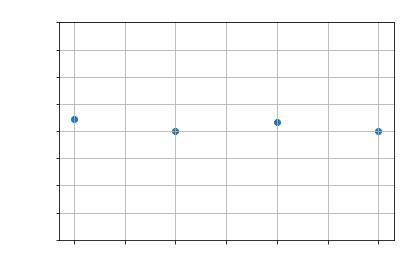

In [0]:
plt.scatter(xaxis, sentiment[2])
plt.grid()
plt.title(f[2] + ' Sentiment Per Sentence', color='w')
plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

## <font color='red'> UNDER CONSTRUCTION </font> 

In [0]:
xaxis1 = []
for i in range(len(sentiment[0])): # sentiment[0] is the list of sentiments for the first key word
  xaxis1.append(i)
print("The xaxis is {}.".format(xaxis1))

The xaxis is [0, 1, 2, 3, 4, 5].


In [0]:
xaxis2 = []
for i in range(len(sentiment[1])): # sentiment[0] is the list of sentiments for the first key word
  xaxis2.append(i)
print("The xaxis is {}.".format(xaxis2))

The xaxis is [].


ValueError: ignored

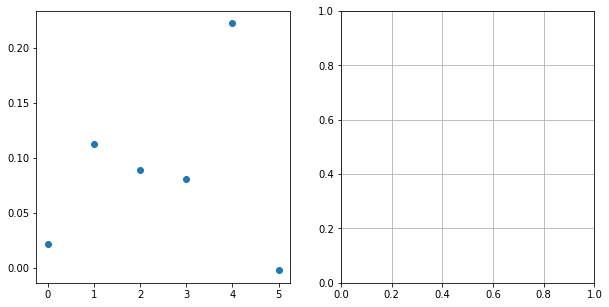

In [0]:
x1 = xaxis1 
x2 = xaxis2
y1 = sentiment[0]
y2 = sentiment[2]

fit, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
plt.grid()
axes[0].scatter(x1,y1)
#plt.grid()
axes[1].scatter(x2,y2)


fig.tight_layout()

AttributeError: ignored

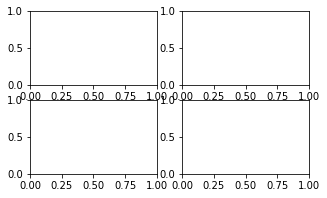

In [0]:

x1 = xaxis1 
x2 = xaxis2
y1 = sentiment[0]
y2 = sentiment[2]

fit, axes = plt.subplots(nrows=2, ncols=2,figsize=(5,3))
axes[0].plot(x1,y1)
axes[2].plot(x2,y2)

# First Subplot
#plt.subplot(1,2,1)
plt.scatter(x1, y1)
plt.grid()
plt.title(f[0] + ' Sentiment Per Sentence', color='w')
plt.ylabel('Sentiment', color='w')
plt.yticks(color='w')
plt.ylim(-1,1)

# Second Subplot
#plt.subplot(1,2,2) 
plt.scatter(x2, y2)
plt.grid()
plt.title(f[2] + ' Sentiment Per Sentence', color='w')
plt.xticks(color='w')

plt.xlabel('Sentence', color='w')
plt.ylabel('Sentiment', color='w')

plt.yticks(color='w')
plt.ylim(-1,1)

plt.tight_layout() # This spaces the graphs out